In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('salary_data_cleaned.csv')

In [64]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,Employer Provided Salary:$75 Per Hour,Position Title: Newborn Screening Data Scienti...,3.2,Info Origin Inc.\r\n3.2,Remote,1 to 50 Employees,-1,Company - Private,-1,...,75,75.0,Info Origin Inc.\r\n,-1,-1,0,0,0,0,0
1,Data Scientist,Employer Provided Salary:$80 - $100 Per Hour,Heavy financial experience\r\nSQL\r\nBe able t...,-1.0,Intuitive Cloud,Remote,-1,-1,-1,-1,...,100,90.0,Intuitive Cloud,-1,-1,1,0,0,0,0
2,Data Scientist,$90K - $126K (Glassdoor est.),Job Overview\r\nCalling all foodie techies! We...,3.5,Chowbus\r\n3.5,"Chicago, IL",51 to 200 Employees,2016,Company - Private,Internet & Web Services,...,126,108.0,Chowbus\r\n,IL,4,0,0,0,0,0
3,Sr. Data Scientist,Employer Provided Salary:$80 - $90 Per Hour,"Bachelor's degree in statistics, applied mathe...",4.8,AGM Tech Solutions\r\n4.8,Remote,51 to 200 Employees,2018,Company - Private,HR Consulting,...,90,85.0,AGM Tech Solutions\r\n,-1,2,1,0,0,0,0
4,Data Scientist (Remote),Employer Provided Salary:$88K - $220K,"At Yelp, it’s our mission to connect people wi...",3.5,Yelp\r\n3.5,Remote,5001 to 10000 Employees,2004,Company - Public,Internet & Web Services,...,220,154.0,Yelp\r\n,-1,16,0,0,0,0,0


In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [66]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [67]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [68]:
df.job_simp.value_counts()

data scientist    191
na                  4
Name: job_simp, dtype: int64

In [69]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        169
jr         20
senior      6
Name: seniority, dtype: int64

In [70]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    47
-1    46
NY    32
GA    15
MA     9
WA     5
CO     5
TX     5
CT     5
MD     4
VA     4
NJ     4
FL     3
UT     3
IL     2
MT     2
PA     1
WI     1
MN     1
NM     1
Name: job_state, dtype: int64

In [71]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       571
1       229
2       674
3      1161
4      1218
5      1231
6       253
7       341
8       867
9       345
10     4766
11      432
12      503
13      810
14      522
15      647
16      309
17      180
18       59
19      871
20      792
21      844
22     2347
23     1152
24      819
25     1752
26     2154
27      764
28     2052
29      859
30      806
31     5703
32      867
33      516
34     3428
35      997
36      833
37      442
38      917
39      829
40      978
41     1340
42      934
43      218
44      901
45     1045
46      549
47      757
48       67
49     3519
50      524
51     1535
52      733
53      442
54     1752
55      806
56      829
57      859
58      917
59       67
60     1485
61     1164
62      733
63     1535
64      524
65      757
66      744
67      218
68      982
69      833
70     1708
71      764
72     1227
73      881
74      269
75     1045
76      929
77      922
78      877
79     1319
80      637
81     1001
82      516
83  

In [72]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [73]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,1,150,150
1,1,160,200
3,1,160,180
6,1,90,100
11,1,140,160
12,1,180,210
16,1,170,170
20,1,142,142


In [74]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))

In [75]:
df['company_txt']

0                              Info Origin Inc.
1                               Intuitive Cloud
2                                       Chowbus
3                            AGM Tech Solutions
4                                          Yelp
5                             NR Consulting LLC
6                            STM Consulting Inc
7                                        Kaygen
8                         FriendFinder Networks
9                                       Spotify
10                                        Cigna
11                         Denken Solutions Inc
12             Nordic Consulting Partners, Inc.
13                                    Altana AI
14                          Synaty Technologies
15                                       Augray
16                          Zodiac Solution Inc
17                                    Starbucks
18                                       Retool
19                                     LiveRamp
20                                Mackin

In [76]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000
mean,3.542564,1499.676923,0.041026,0.087179,80.687179,147.574359,110.920513,43.338462,0.107692,0.0,0.015385,0.041026,0.041026,1066.625641
std,1.486428,837.255669,0.198860,0.282824,18.657510,17.533131,11.972696,52.586486,0.310789,0.0,0.123394,0.198860,0.198860,903.677617
min,-1.000000,-1.000000,0.000000,0.000000,55.000000,60.000000,47.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,59.000000
25%,3.500000,1831.000000,0.000000,0.000000,73.000000,152.000000,112.500000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,552.000000
50%,3.900000,1945.000000,0.000000,0.000000,73.000000,152.000000,112.500000,20.000000,0.000000,0.0,0.000000,0.000000,0.000000,859.000000
75%,4.200000,2004.500000,0.000000,0.000000,87.500000,152.000000,112.500000,76.500000,0.000000,0.0,0.000000,0.000000,0.000000,1169.500000
max,5.000000,2018.000000,1.000000,1.000000,180.000000,230.000000,185.000000,192.000000,1.000000,0.0,1.000000,1.000000,1.000000,5703.000000


In [77]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

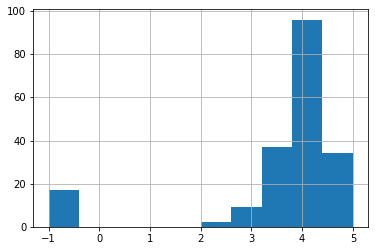

In [78]:
df.Rating.hist()

<AxesSubplot:>

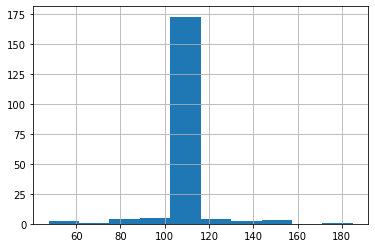

In [79]:
df.avg_salary.hist()

<AxesSubplot:>

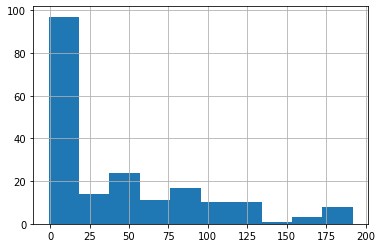

In [80]:
df.age.hist()

<AxesSubplot:>

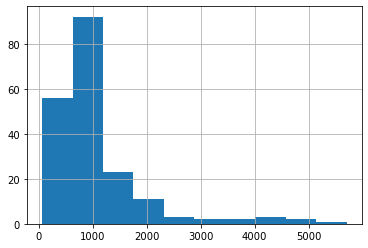

In [81]:
df.desc_len.hist()

<AxesSubplot:>

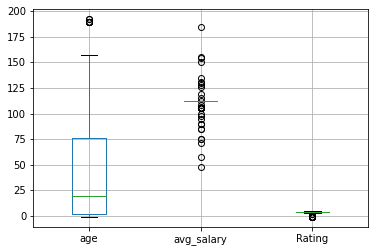

In [82]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

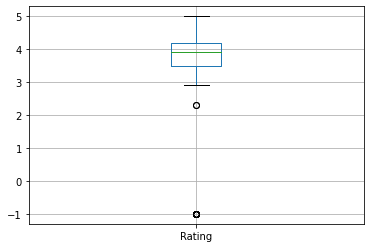

In [83]:
df.boxplot(column = 'Rating')

In [84]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.034433,0.245987,0.098257
avg_salary,0.034433,1.000000,-0.054913,0.039253
Rating,0.245987,-0.054913,1.000000,0.091617
desc_len,0.098257,0.039253,0.091617,1.000000


<AxesSubplot:>

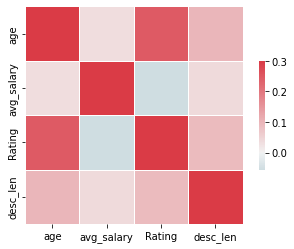

In [85]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=0.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [86]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [87]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 45


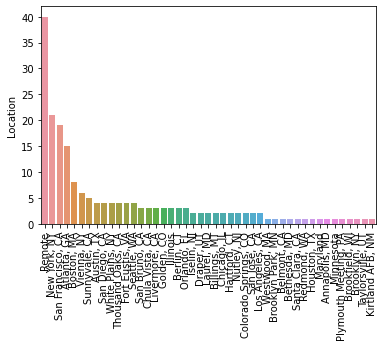

graph for Size: total = 9


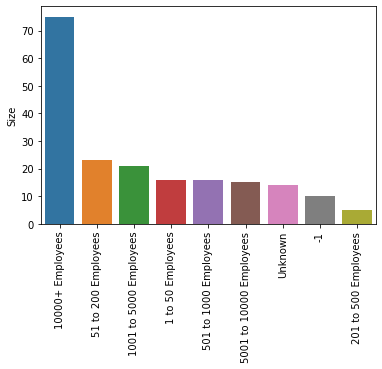

graph for Type of ownership: total = 8


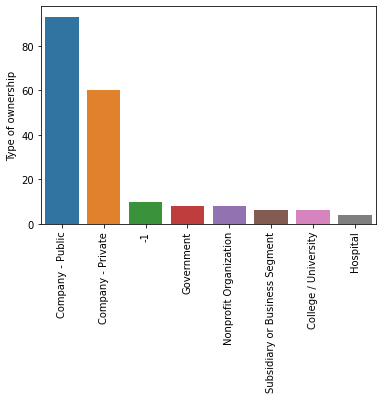

graph for Industry: total = 32


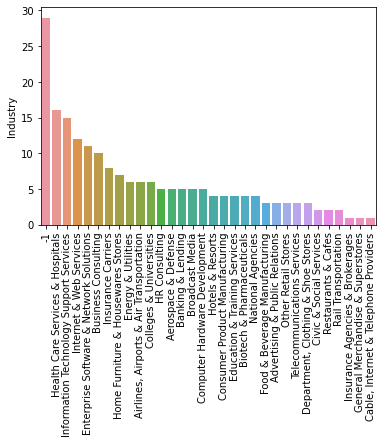

graph for Sector: total = 20


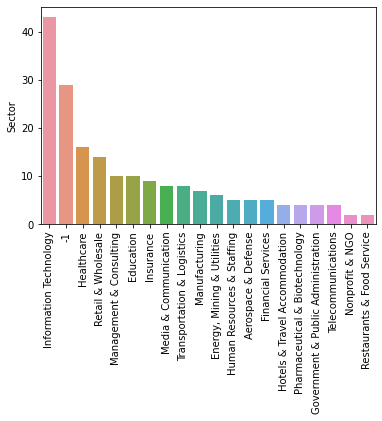

graph for Revenue: total = 11


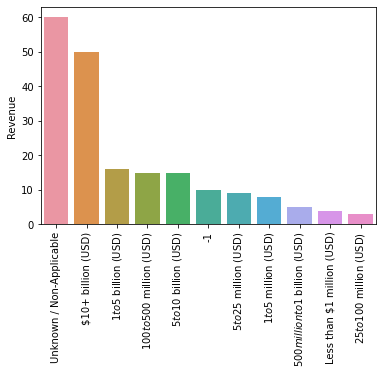

graph for company_txt: total = 93


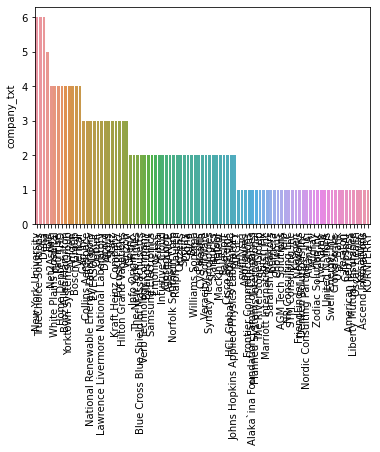

graph for job_state: total = 20


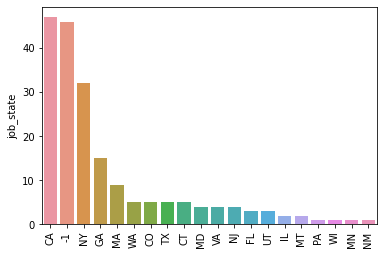

graph for python_yn: total = 2


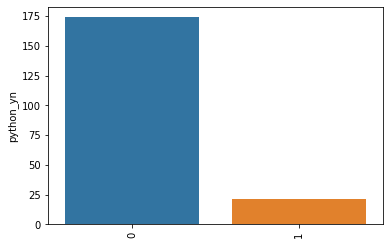

graph for R_yn: total = 1


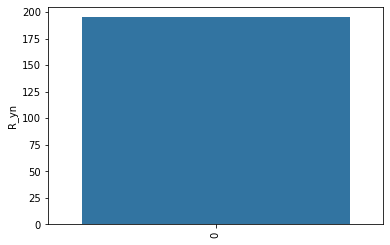

graph for spark_yn: total = 2


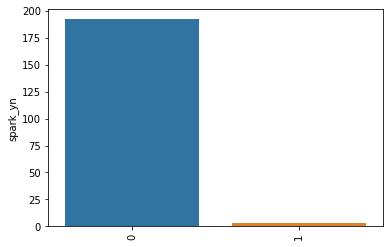

graph for aws_yn: total = 2


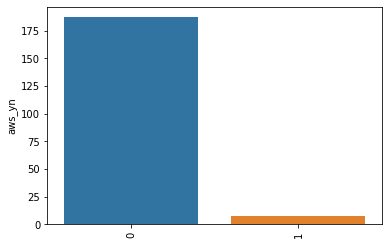

graph for excel_yn: total = 2


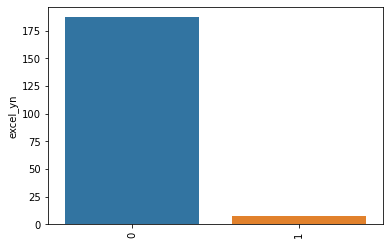

graph for job_simp: total = 2


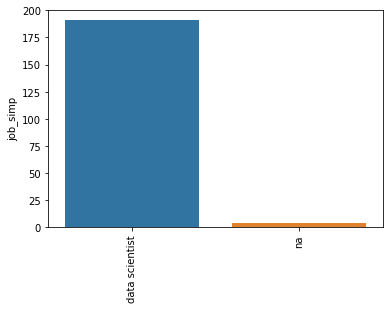

graph for seniority: total = 3


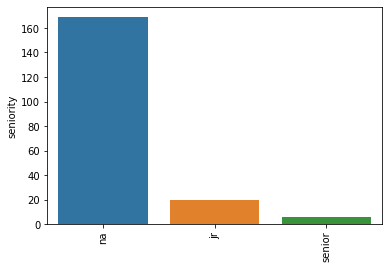

In [88]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


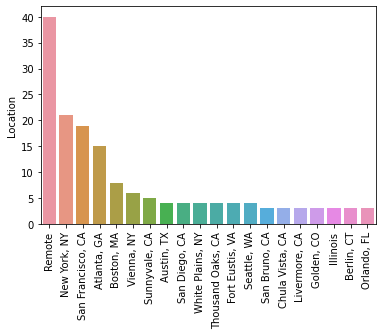

graph for company_txt: total = 20


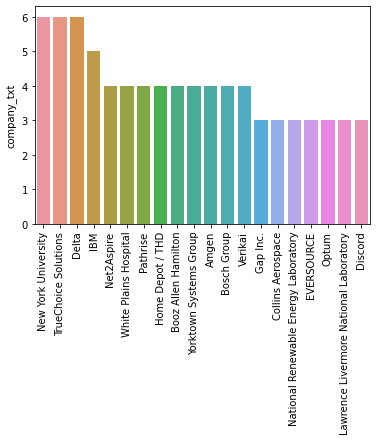

In [89]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [90]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [91]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data scientist,110.924084
na,110.750000


In [92]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
data scientist jr         111.100000
               na         110.839394
               senior     112.666667
na             na         110.750000

In [93]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

,,avg_salary
job_state,job_simp,
WI,data scientist,57.500000
WA,data scientist,106.600000
VA,data scientist,110.750000
UT,data scientist,106.500000
TX,data scientist,112.500000
PA,data scientist,131.000000
NY,data scientist,114.890625
NM,data scientist,112.500000
NJ,data scientist,109.000000


In [94]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [95]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

,,avg_salary
job_state,job_simp,
WI,data scientist,1
WA,data scientist,5
VA,data scientist,4
UT,data scientist,3
TX,data scientist,5
PA,data scientist,1
NY,data scientist,32
NM,data scientist,1
NJ,data scientist,4


In [96]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
PA,131.000000
NY,114.890625
MT,112.500000
NM,112.500000
TX,112.500000
MD,112.500000
MA,111.722222
GA,111.100000
CA,110.851064


In [97]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership, 'avg_salary',
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary',]]

In [98]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [99]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 3.5    117.785714
-1.0    112.941176
 4.1    112.676471
 4.0    112.611111
 2.9    112.500000
 3.1    112.500000
 4.9    112.500000
 4.7    112.500000
 4.4    111.800000
 3.0    111.750000
 4.2    111.343750
 3.7    111.333333
 3.3    111.100000
 3.4    110.750000
 4.6    110.166667
 4.5    110.166667
 5.0    110.166667
 3.6    110.166667
 3.8    110.000000
 2.3    109.000000
 4.3    107.875000
 4.8    107.625000
 3.9    107.600000
 3.2     93.750000
Industry
                                         avg_salary
Industry                                           
Enterprise Software & Network Solutions  119.681818
Computer Hardware Development            118.600000
Business Consulting                      115.550000
National Agencies                        114.625000
Internet & Web Services                  114.583333
Home Furniture & Housewares Stores       113.142857
Insurance Agencies & Brokerages          112.500000
Biotech & Pharmaceutic

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [100]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),16.0,NaN
$1 to $5 million (USD),8.0,NaN
$10+ billion (USD),45.0,5.0
$100 to $500 million (USD),12.0,3.0
$25 to $100 million (USD),3.0,NaN
$5 to $10 billion (USD),14.0,1.0
$5 to $25 million (USD),8.0,1.0
$500 million to $1 billion (USD),5.0,NaN
-1,7.0,3.0


In [104]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [105]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\gwena/nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\gwena\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
